### Exploring Data
Plot distributions and generate pictures

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from pathlib import Path

%matplotlib inline

#### Examine the most and least frequent samples

In [21]:
df = pd.read_csv('data/labels.csv')

In [22]:
dist = df.groupby('breed').count().rename(columns={'id':'freq'})

In [23]:
most_common = dist.sort_values(by='freq',ascending=False)[:5]
least_common = dist.sort_values(by='freq',ascending=True)[:5]

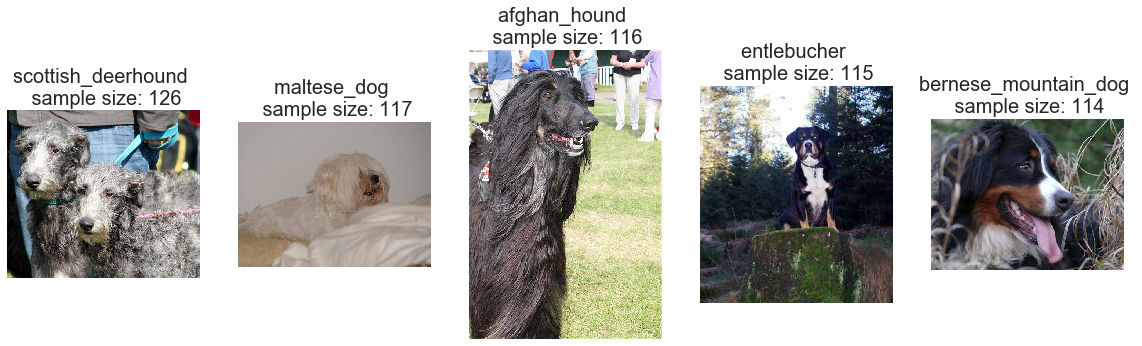

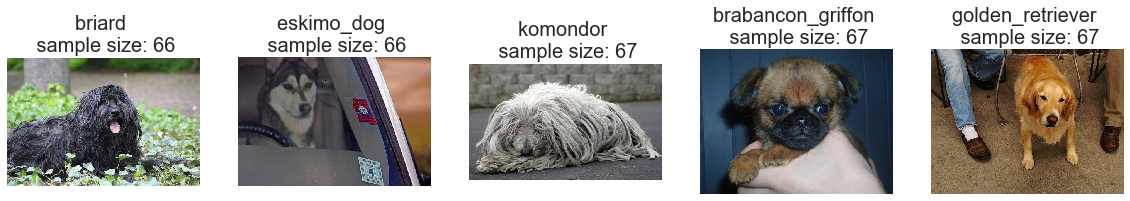

In [24]:
#Iterate over two distributional ends
for dist_end in [most_common, least_common]:
    fig = plt.figure(figsize=(20,20))
    for i, breed in enumerate(list(dist_end.index)):
        sample_size = dist[dist.index==breed]['freq'][0]
        #Randomly sample one picture from each breed
        breed_id = df[df['breed']==breed]['id'].iloc[np.random.randint(0,sample_size)]
        image = Image.open('data/train/'+breed_id+'.jpg','r')
        ax = fig.add_subplot(1,5,i+1)
        plt.imshow(image)
        #Hide grid
        ax.grid(False)
        #Hide x and y axes
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #Set title with the breed name and sample size
        ax.set_title('{} \n sample size: {}'.format(breed,dist_end[dist_end.index==breed]['freq'][0]),fontsize=20)

#### One Breed One Picture
for human learning

In [32]:
all_breeds = df['breed'].unique()
len(all_breeds)

120

In [ ]:
#create folder called "dogs" in folder "data"
fig = plt.figure(figsize=(50,50))
my_file = Path('./data/dogs/affenpinscher.png')
if not my_file.exists():
    print("Generating Files...")
    for breed in all_breeds:
        sample_size = dist[dist.index==breed]['freq'][0]
        #Randomly sample one picture from each breed
        breed_id = df[df['breed']==breed]['id'].iloc[np.random.randint(0,sample_size)]
        with Image.open('data/train/'+breed_id+'.jpg','r') as image:
            plt.imshow(image)
        ax = fig.add_subplot(111)
        #Hide grid
        ax.grid(False)
        #Hide x and y axes
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #Set title with the breed name and sample size
        ax.set_title(breed,fontsize=300)
        plt.savefig('data/dogs/'+breed)
        plt.cla()
    plt.clf()
    print("Done")
else: 
    print("Files exist!")

Generating Files...
